# Obtain detuning from FID

In [1]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np
from pathlib import Path

#absolute path of repo root
rel_path = Path("/home/ben/Documents/Repos/382L_NMRLab/")

In [2]:
omega = 6477371
FIDData = pd.read_csv(rel_path / f"data/nmr_ben_rb/FID/{str(omega)}.csv", header = None)
buffer = 0 #increasing the cutoff makes the fit better
cutoff = np.argmax(np.diff(FIDData[1]))+buffer

In [3]:
def smooth(y, pts): #Rolling avg smoothing
    box = np.ones(pts)/pts
    yfilt=np.convolve(y,box,mode='same')
    return yfilt

In [4]:
#trim out saturated data
chan1 = FIDData[1][cutoff:].values
chan2 = FIDData[2][cutoff:].values
tlist = FIDData[0][cutoff:].values

#tstep is 2e-6 (units of seconds)
tstep = tlist[1]-tlist[0]

#adjust y axis (needed for getting maxima by squaring)
chan1 = np.subtract(chan1, np.mean(chan1[1000:]))
chan2 = np.subtract(chan2, np.mean(chan2[1000:]))

trans_mag = np.sqrt(np.add(np.square(chan1), np.square(chan2)))

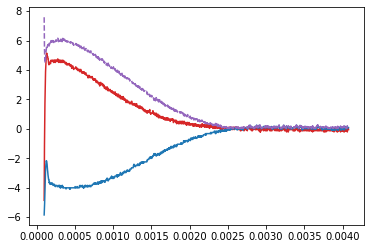

In [5]:
#plt.plot(tlist, chan1_smooth, color = "tab:red")
plt.plot(tlist, chan1, color = "tab:red")
#plt.plot(tlist, chan2_smooth, color = "tab:blue")
plt.plot(tlist, chan2, color = "tab:blue")
plt.plot(tlist, trans_mag, color = "tab:purple", linestyle = "--")

## Fit exponential

In [6]:
def exp(t, a, b):
    return a*np.exp(-t*b)

from scipy.optimize import curve_fit

popt, pcov = curve_fit(exp, tlist, trans_mag)

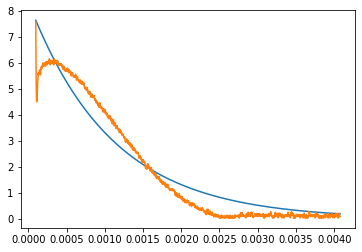

In [7]:
plt.plot(tlist, [exp(t, *popt) for t in tlist])
plt.plot(tlist, trans_mag)